In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import xarray as xr
import pandas as pd
import scipy as sp


# from numpy.fft import fft, fftfreq, rfft, ifft, fftshift
# from scipy.fft import fft, fftfreq, rfft, ifft, fftshift
from waveletFunctions import wave_signif, wavelet
%matplotlib inline

ModuleNotFoundError: No module named 'waveletFunctions'

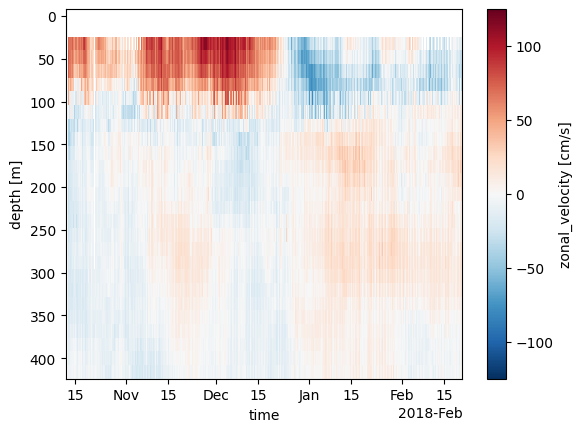

In [3]:
# Read data
filename = 'processed.nc'
ds = xr.open_dataset(filename)

# Contourf plot
ds.u.T.plot()
plt.gca().invert_yaxis()
plt.show()




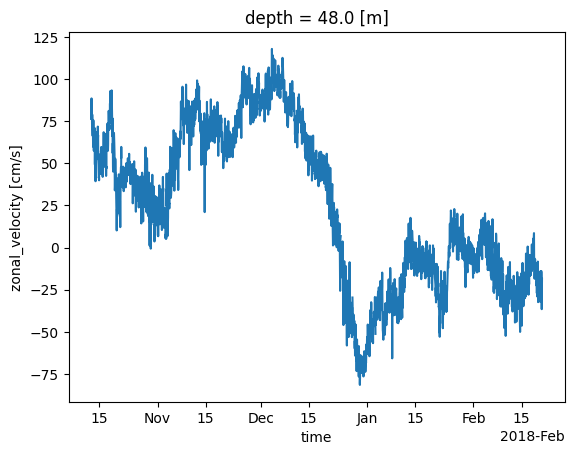

In [4]:
ds.u.sel(depth=48).plot()
plt.show()

In [8]:
# Slice the data and fill the gap
data_slice = ds.sel(time=slice("2017-11-01T00:00:00","2018-02-20T23:00:00"), depth=48)
u = data_slice.u.interpolate_na(dim="time", method='linear').data
time = data_slice.time.data

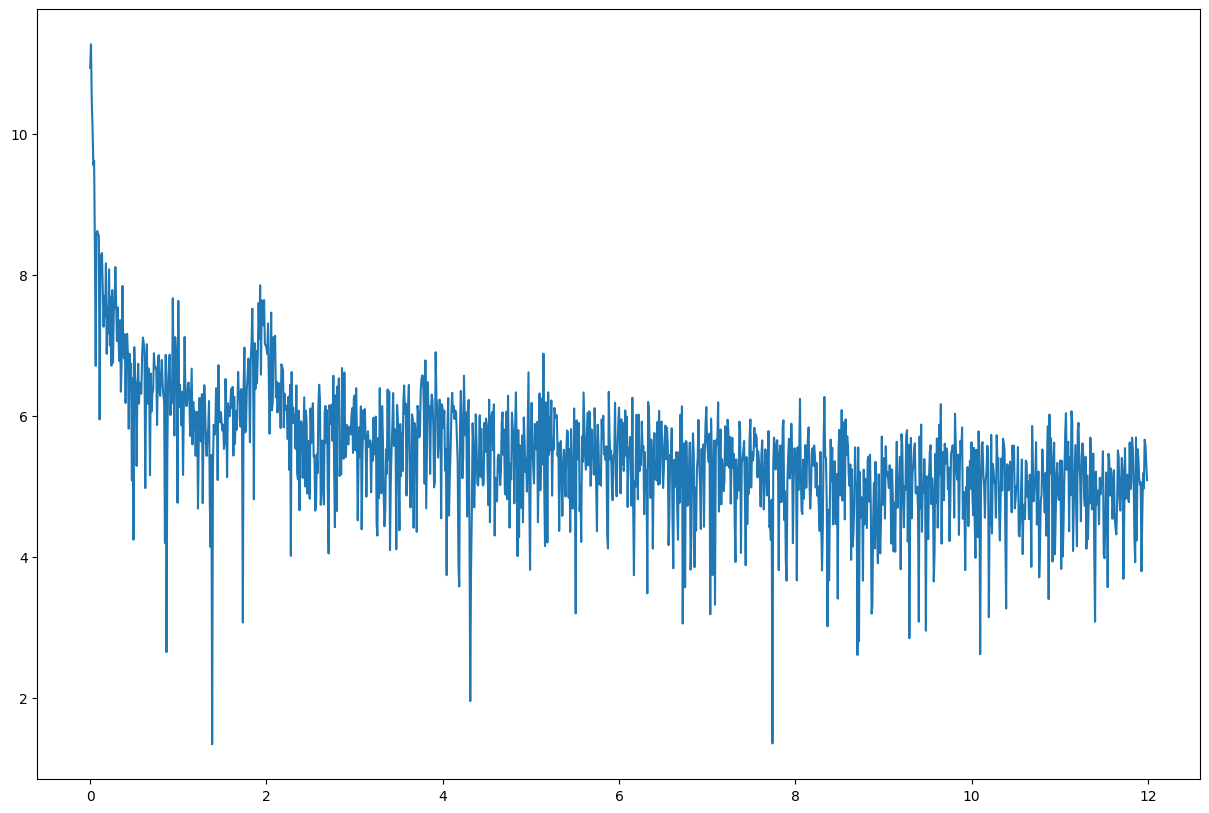

In [41]:
# FFT using numpy
u_cfft = np.fft.fft(u)
u_rfft = np.fft.rfft(u)
u_afft = np.abs(u_cfft)
u_len = len(u)
u_freq = np.fft.fftfreq(u_len, d=1/24)

plt.plot(u_freq[:int(u_len/2)], np.log(u_afft[:int(u_len/2)]))
plt.show()

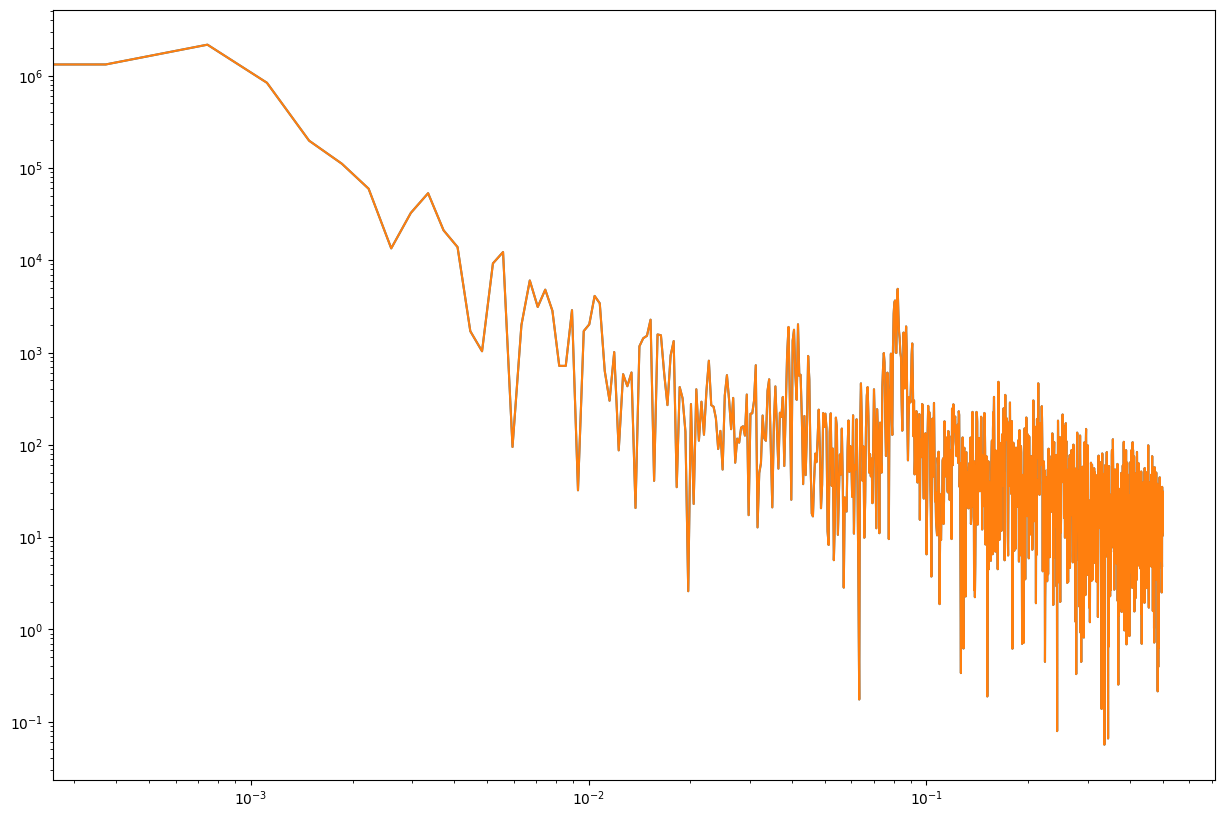

In [40]:
from scipy.signal import periodogram, welch
# Calculate periodogram without smoothing
f, psd = periodogram(u, fs=1.0, window='hann', detrend='linear', scaling='density', return_onesided=True)

# Plot the periodogram
plt.loglog(f, psd)
plt.show()


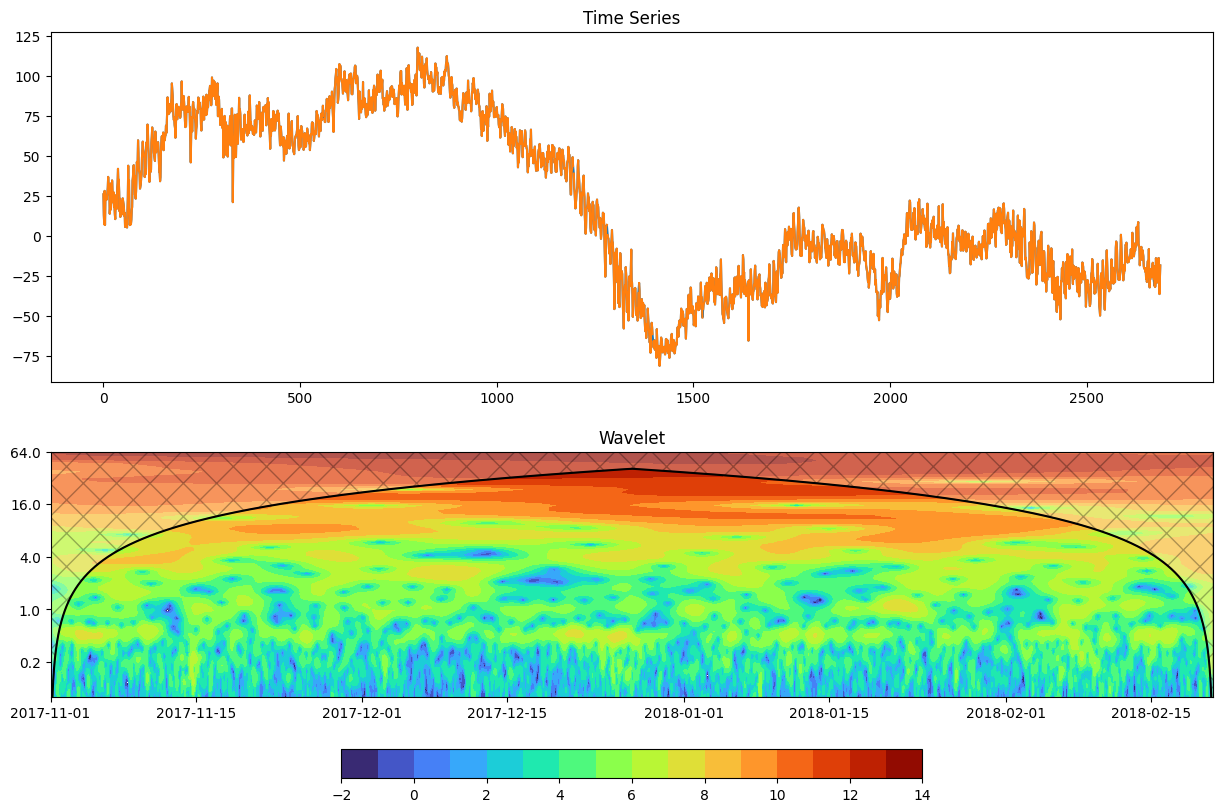

In [7]:
# Define all parameters
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import xarray as xr
import pandas as pd
import scipy as sp

# Read data
filename = 'processed.nc'
ds = xr.open_dataset(filename)
# Slice the data and fill the gap
data_slice = ds.sel(time=slice("2017-11-01T00:00:00","2018-02-20T23:00:00"), depth=48)
u = data_slice.u.interpolate_na(dim="time", method='linear').data
time = data_slice.time.data
# from numpy.fft import fft, fftfreq, rfft, ifft, fftshift
# from scipy.fft import fft, fftfreq, rfft, ifft, fftshift
from waveletFunctions import wave_signif, wavelet
%matplotlib inline
dt = 1/24
pad = 1  # pad the time series with zeroes (recommended)
dj = 0.1  # this will do 4 sub-octaves per octave
s0 = 2 * dt  # this says start at a scale of 2 hours
j1 = 10 / dj  # this says do 9 powers-of-two with dj sub-octaves each
mother = 'MORLET'

# Compute the wavelet
wave, period, scale, coi = wavelet(u, dt, pad, dj, s0, j1, mother)
power = (np.abs(wave))**2



# Set plot parameters
plt.rcParams["figure.figsize"] = (15,10)
fig, axs = plt.subplots(2, 1)
ax1 = axs[0]
ax2 = axs[1]
lev = np.arange(-2, 15.0, 1) # Contour levels
lev2 = np.arange(4, 10, 2)

# Plot time series
ax1.plot(u)
ax1.plot(data_slice.u.data)
ax1.set_title('Time Series')

# Plot wavelet
im = ax2.contourf(time, period, np.log(power), cmap='turbo', levels=lev)

ax2.plot(time, coi, color='k') # COI
ax2.fill_between(time, coi * 0 + period[-1], coi, facecolor="white",
    edgecolor="#00000040", hatch='x', alpha=0.3) # For filling region outside COI
ax2.set_yscale('log', base=2, subs=None) # Set y-scale to log scale
ax2.set_ylim([0.1, 64])
fig.colorbar(im, ax=ax2, location='bottom', shrink=0.5)
ax2y = plt.gca().yaxis
ax2y.set_major_formatter(ticker.ScalarFormatter())
ax2.set_title('Wavelet')
plt.show()